# COVID-19 Case Forecaster using ARIMA Models

Using standard ARIMA forecasting techniques, I looked to predict the future of corona-virus cases in India

### Standard Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### pmdarima helps efficiently calculate the best p,d,q values for ARIMA models

In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Imported the dataset called confirmed.csv. I'm using data from March 12 onwards

In [4]:
# cvd19_confirmed = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)[50:]
cvd19_confirmed = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)[8:]

In [5]:
cvd19_confirmed.index.freq = 'D'

In [6]:
cvd19_confirmed.head()

,Unnamed: 0,India
Date,,
2020-01-30,8,1
2020-01-31,9,1
2020-02-01,10,1
2020-02-02,11,2
2020-02-03,12,3


In [7]:
cvd19_confirmed.tail()

,Unnamed: 0,India
Date,,
2020-06-01,131,198370
2020-06-02,132,207191
2020-06-03,133,216824
2020-06-04,134,226713
2020-06-05,135,236184


In [8]:
cvd19_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2020-01-30 to 2020-06-05
Freq: D
Data columns (total 2 columns):
Unnamed: 0    128 non-null int64
India         128 non-null int64
dtypes: int64(2)
memory usage: 3.0 KB


### Setting index, cleaning blank columns

In [9]:
cvd19_confirmed = cvd19_confirmed.drop('Unnamed: 0', axis=1)

In [10]:
len(cvd19_confirmed['India'])

128

In [11]:
cvd19_confirmed.head(20)

,India
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
2020-02-04,3
2020-02-05,3
2020-02-06,3
2020-02-07,3


### Importing plot_acf, plot_pacf for understanding nature of data. 
### Importing seasonal_decompose to find seasonality and trend of data

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decompose = seasonal_decompose(cvd19_confirmed['India'], model='multiplicative');

#### Data is non seasonal

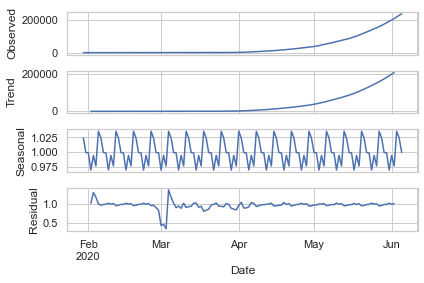

In [14]:
decompose.plot();

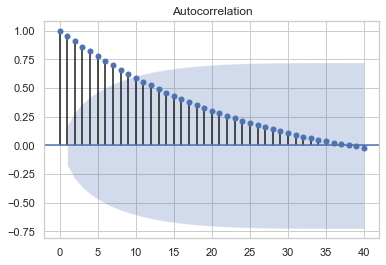

In [15]:
acf=plot_acf(cvd19_confirmed['India'], lags=40)

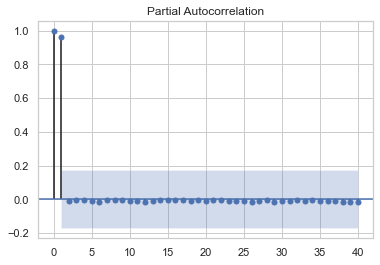

In [16]:
pacf=plot_pacf(cvd19_confirmed['India'], lags=40)

In [17]:
# Strong AR System. p = 1, q = 0

In [18]:
pmd = auto_arima(cvd19_confirmed['India'], seasonal=False, trace=True)

Fit ARIMA: order=(2, 2, 2); AIC=1858.172, BIC=1875.189, Fit time=1.602 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1876.018, BIC=1881.691, Fit time=0.017 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1855.294, BIC=1863.803, Fit time=0.149 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1855.704, BIC=1864.213, Fit time=0.159 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1855.225, BIC=1866.570, Fit time=0.190 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1857.049, BIC=1871.231, Fit time=0.403 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1855.947, BIC=1872.965, Fit time=0.725 seconds
Fit ARIMA: order=(3, 2, 0); AIC=1856.765, BIC=1870.946, Fit time=0.297 seconds
Total fit time: 3.934 seconds


### Best fit model is (0, 2, 1)

In [19]:
pmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  126
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -923.612
Method:                       css-mle   S.D. of innovations            368.879
Date:                Sat, 13 Jun 2020   AIC                           1855.225
Time:                        16:55:13   BIC                           1866.570
Sample:                             2   HQIC                          1859.834
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.7785     20.789      3.693      0.000      36.033     117.524
ar.L1.D2.y    -0.4591      0.088     -5.188      0.000      -0.633      -0.286
ar.L2.D2.y    -0.1274      0.088     -1.445      0.151      -0.300       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8013           -2.1453j            2.8013           -0.3612
AR.2           -1.8013           +2.1453j            2.8013            0.3612
-----------------------------------------------------------------------------
"""

### Importing ARIMA library

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model=ARIMA(cvd19_confirmed['India'], order=(2, 2, 0))

In [22]:
fit_model=model.fit()

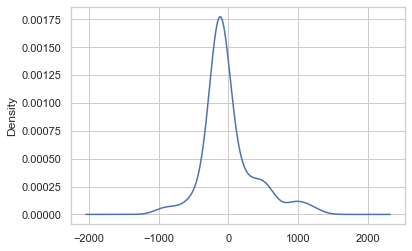

In [23]:
fit_model.resid.plot(kind='kde')

In [24]:
future_pred = pd.DataFrame()

In [25]:
future_pred['Predictions'] = fit_model.predict(start=2, end=len(cvd19_confirmed)+30, typ='levels')

In [26]:
future_pred.tail(12)

,Predictions
2020-06-25,445134.027530
2020-06-26,456385.898206
2020-06-27,467714.547370
2020-06-28,479119.975023
2020-06-29,490602.181164
2020-06-30,502161.165795
2020-07-01,513796.928914
2020-07-02,525509.470522
2020-07-03,537298.790619
2020-07-04,549164.889204


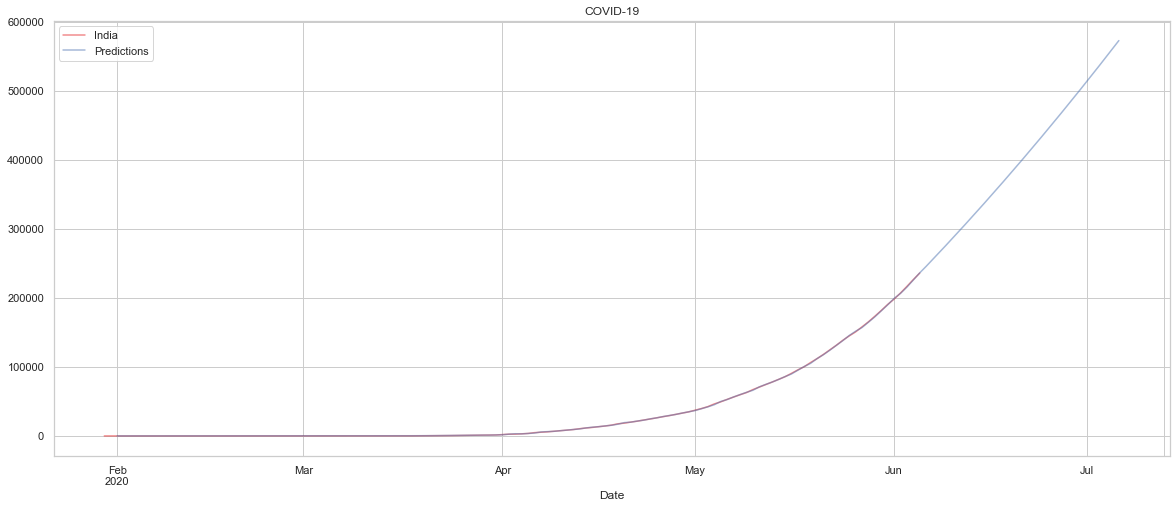

In [27]:
cvd19_confirmed.plot(figsize=(20, 8), legend=True, colormap='Set1', alpha=0.5, title='COVID-19')
future_pred['Predictions'].plot(legend=True, alpha=0.5)

In [28]:
future_pred['New cases'] = future_pred['Predictions'].diff(1)

In [29]:
future_pred.head()

,Predictions,New cases
2020-02-01,77.778489,NaN
2020-02-02,109.043547,31.265058
2020-02-03,124.352799,15.309252
2020-02-04,125.684469,1.331670
2020-02-05,125.271006,-0.413463


In [30]:
future_pred.tail(15)

,Predictions,New cases
2020-06-22,411839.086436,10944.756717
2020-06-23,422860.621646,11021.535211
2020-06-24,433958.935344,11098.313698
2020-06-25,445134.027530,11175.092187
2020-06-26,456385.898206,11251.870675
2020-06-27,467714.547370,11328.649164
2020-06-28,479119.975023,11405.427653
2020-06-29,490602.181164,11482.206142
2020-06-30,502161.165795,11558.984630
2020-07-01,513796.928914,11635.763119


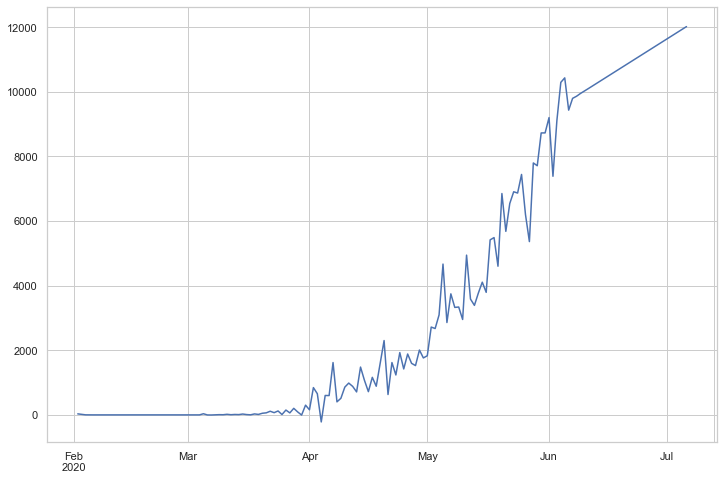

In [31]:
future_pred['New cases'].plot(figsize=(12, 8))